In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

In [27]:
#Loading mnist dataset
(x_train, _), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
#From tensorflow tutorial
#https://www.tensorflow.org/tutorials/generative/autoencoder
class Autoencoder(Model):
  def __init__(self, latent_dim, shape):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    self.shape = shape
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(tf.math.reduce_prod(shape).numpy(), activation='sigmoid'),
      layers.Reshape(shape)
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded


In [17]:
shape = x_test.shape[1:]
latent_dim = 2
autoencoder = Autoencoder(latent_dim, shape)

In [18]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [19]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0894 - val_loss: 0.0600
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0594 - val_loss: 0.0580
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0577 - val_loss: 0.0571
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0570 - val_loss: 0.0566
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0567 - val_loss: 0.0563
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0565 - val_loss: 0.0561
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0562 - val_loss: 0.0560
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0561 - val_loss: 0.0558
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0561 - val_loss: 0.0557
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0558 - val_loss: 0.0556


In [20]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

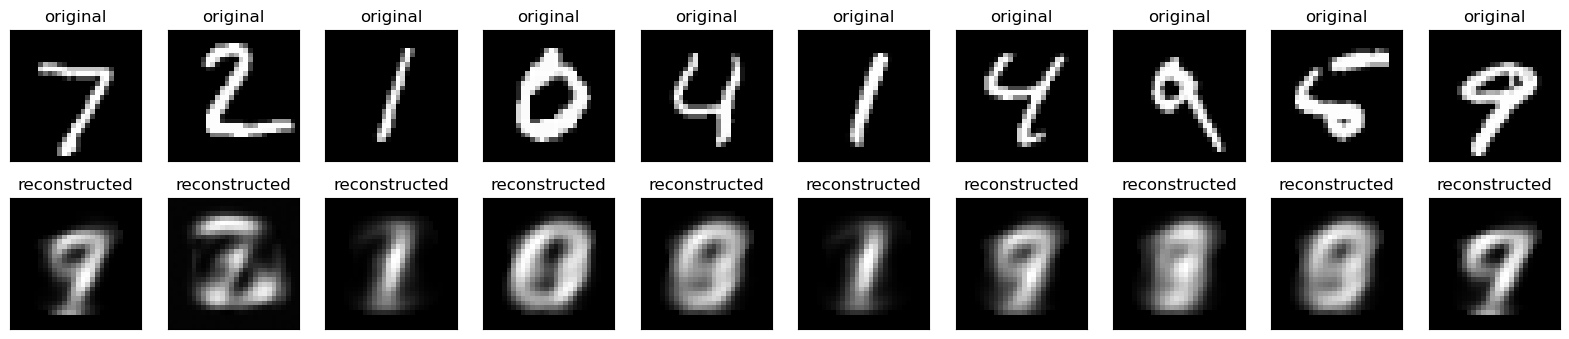

In [21]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

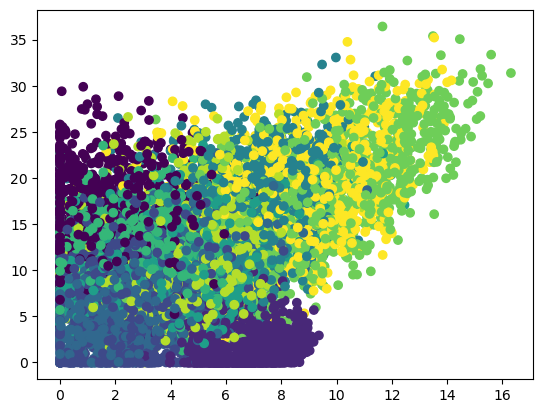

In [34]:
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c=y_test, cmap="viridis")

In [2]:
import functions

In [ ]:
#Doing the same with the functions.py file
autoencoder3 = functions.train_autoencoder(x_train, x_test, latent_dim=3)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0854 - val_loss: 0.0550
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0547 - val_loss: 0.0528
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0528 - val_loss: 0.0520
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0521 - val_loss: 0.0517
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0518 - val_loss: 0.0514
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0515 - val_loss: 0.0512
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0513 - val_loss: 0.0510
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0511 - val_loss: 0.0508
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0509 - val_loss: 0.0507
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0507 - val_loss: 0.0506


In [50]:
encoded_imgs = autoencoder3.encoder(x_test).numpy()
decoded_imgs = autoencoder3.decoder(encoded_imgs).numpy()

In [ ]:
#Run when functions file is updated
import importlib
importlib.reload(functions)

<module 'functions' from 'c:\\Users\\jonas\\OneDrive - UGent\\MaStat\\Big data algorithms\\Project code\\bda-project\\functions.py'>

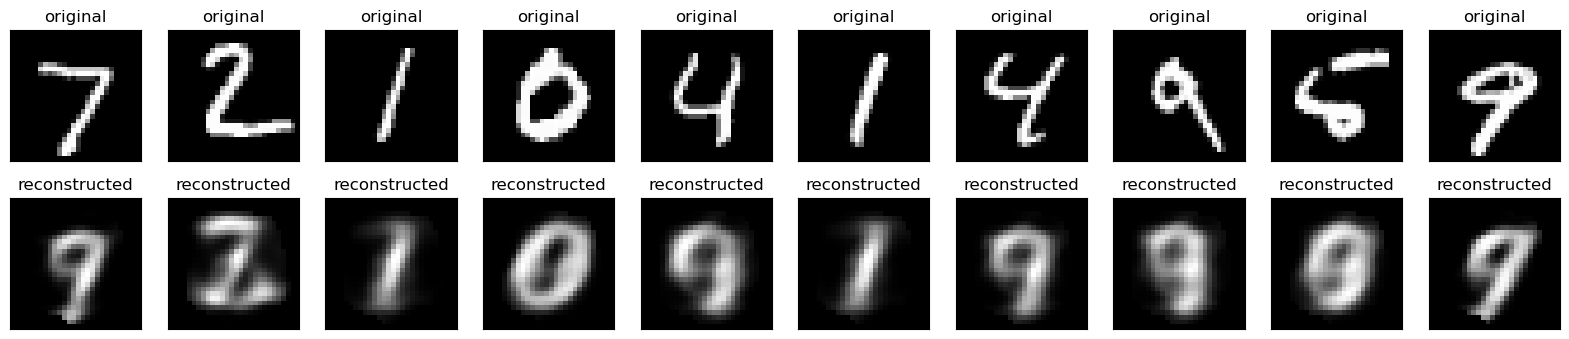

In [51]:
functions.plot_reconstruction(x_test, decoded_imgs)

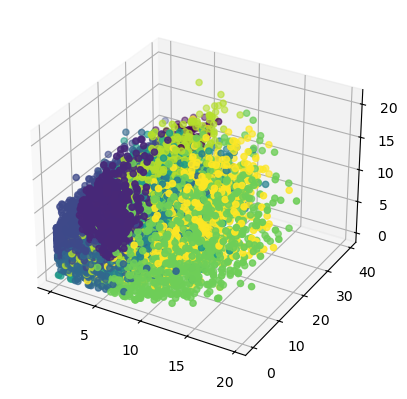

In [53]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1],encoded_imgs[:, 2],  c=y_test, cmap="viridis")

In [5]:
#Toy example data inspired by
#https://www.researchgate.net/publication/331714929_Overview_of_spectral_dimensionality_reduction_and_application_to_social_network_embedding
#28x28 Pictures of vertical rectangles or horizontal rectangles (either 10x5 or 5x10)
np.random.seed(123)
labels = np.random.randint(0, 2, size=70000)

In [3]:
def generate_rectangle(label, size=28):
    rectangle = np.zeros((size, size))
    if label == 0:
        start_x = np.random.randint(0, 22)
        start_y = np.random.randint(0, 17)
        rectangle[start_y:start_y+10, start_x:start_x+5] = 1
    if label == 1:
        start_x = np.random.randint(0, 17)
        start_y = np.random.randint(0, 22)
        rectangle[start_y:start_y+5, start_x:start_x+10] = 1
    return rectangle

In [6]:
rectangles = np.array([generate_rectangle(i) for i in labels])

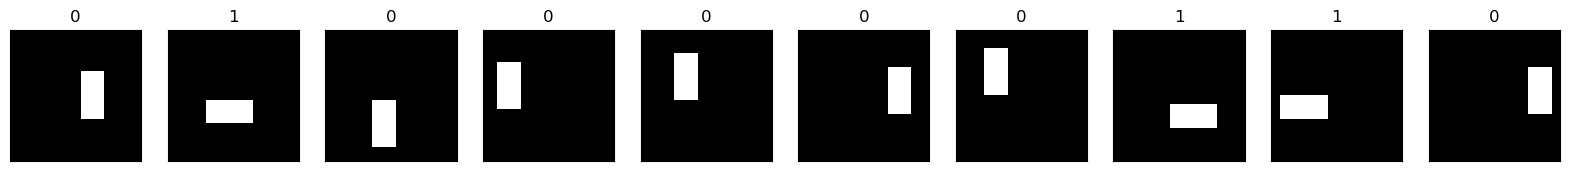

In [6]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(1, n, i + 1)
  plt.imshow(rectangles[i])
  plt.title(labels[i])
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [7]:
rectangles[60001:, ].shape

(9999, 28, 28)

In [10]:
autoencoder_rect = functions.train_autoencoder(rectangles[0:60000, ], rectangles[60001:, ], latent_dim=2)

Epoch 1/10
1628/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0902

KeyboardInterrupt: 

In [89]:
encoded_rect = autoencoder_rect.encoder(rectangles[60001:, ]).numpy()
decoded_rect = autoencoder_rect.decoder(encoded_rect).numpy()

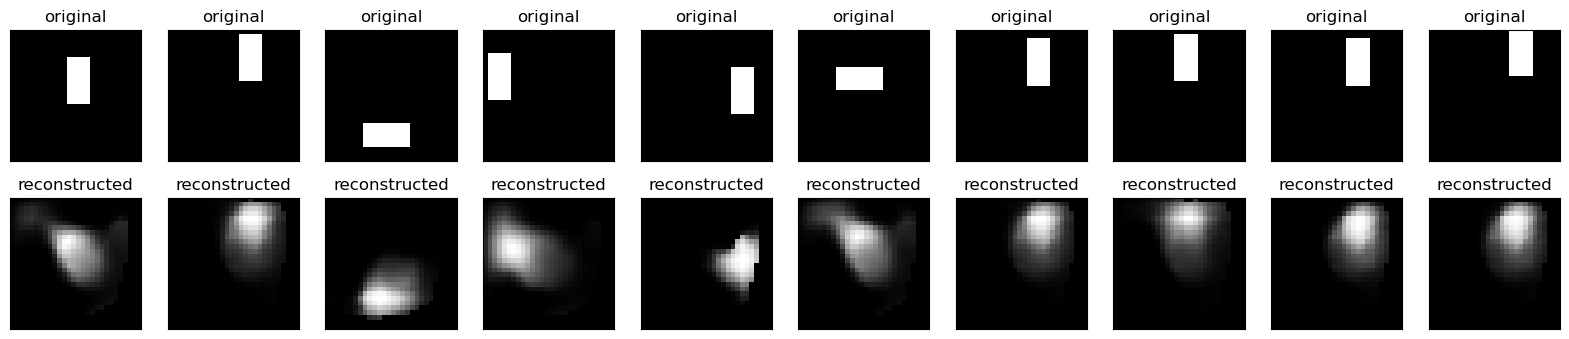

In [90]:
functions.plot_reconstruction(rectangles[60001:, ], decoded_rect)

In [91]:
print(encoded_rect[:, 0].shape)

(9999,)


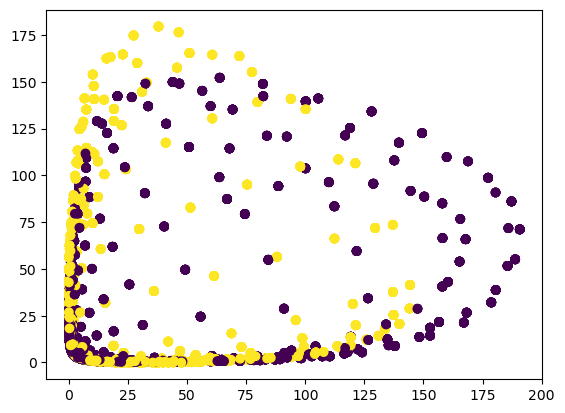

In [93]:
plt.scatter(encoded_rect[:, 0], encoded_rect[:, 1], c=labels[60001:], cmap="viridis")
plt.show()

In [7]:
autoencoder_rect3 = functions.train_autoencoder(rectangles[0:60000, ], rectangles[60001:, ], latent_dim=3)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0806 - val_loss: 0.0367
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0353 - val_loss: 0.0324
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0318 - val_loss: 0.0301
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0298 - val_loss: 0.0286
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0285 - val_loss: 0.0276
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0275 - val_loss: 0.0269
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0268 - val_loss: 0.0262
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0261 - val_loss: 0.0257
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0257 - val_loss: 0.0253
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0253 - val_loss: 0.0250


In [8]:
encoded_img, decoded_img = functions.get_reconstructed_img(autoencoder_rect3, rectangles[60001:, ])

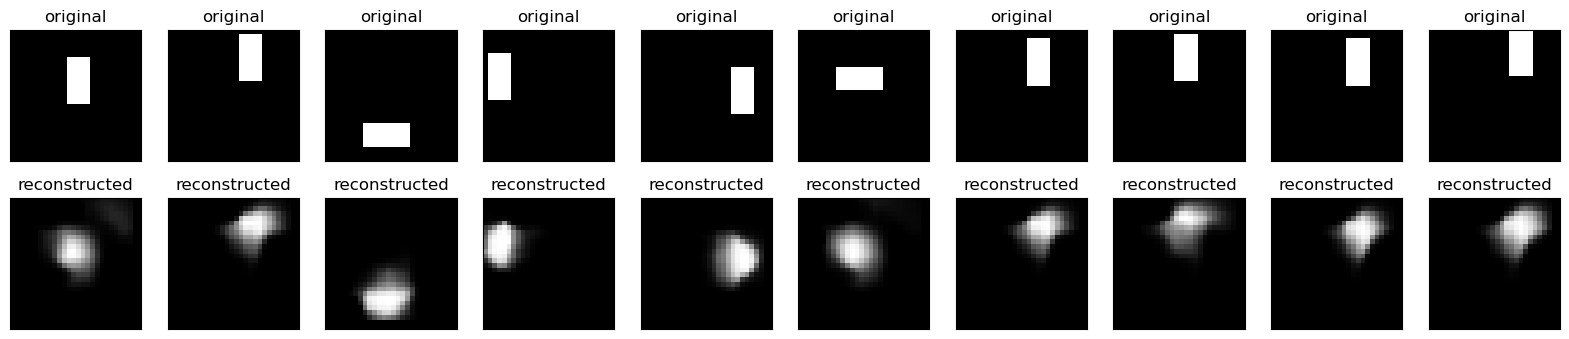

In [9]:
functions.plot_reconstruction(rectangles[60001:, ], decoded_img)

In [10]:
import plotly.express as px
import nbformat

In [11]:
fig = px.scatter_3d(x=encoded_img[:, 0], y=encoded_img[:, 1],z=encoded_img[:, 2], color=labels[60001:])
fig.show()

In [20]:
#For more intuition: 2D to 1D example
#Inspired by https://www.sciencedirect.com/science/article/pii/S0925231215017671?via%3Dihub

#Generate nonlinear curve
x_coord = 10*np.random.random_sample(size = 1000)-5
y_coord = np.tanh(x_coord)

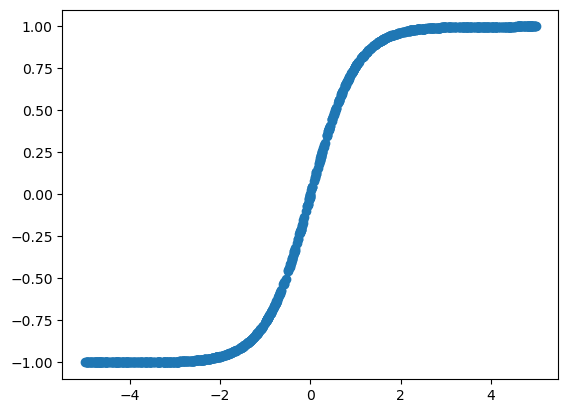

In [ ]:
plt.scatter(x_coord, y_coord)
plt.show()

In [71]:
x = np.vstack((x_coord, y_coord)).T

In [72]:
autoencoder = functions.train_autoencoder(x[:799], x[800:], latent_dim=1)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.1056 - val_loss: 4.7036
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.6598 - val_loss: 4.6339
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.7231 - val_loss: 4.5610
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.4857 - val_loss: 4.4883
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.5899 - val_loss: 4.4158
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.6006 - val_loss: 4.3465
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.5678 - val_loss: 4.2837
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.1540 - val_loss: 4.2251
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.4097 - val_loss: 4.1695
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.2453 - val_loss: 4.1217


In [73]:
coord_enc, reconstructed = functions.get_reconstructed_img(autoencoder, x[800:])

In [74]:
coord_enc[:, 0].shape

(200,)

In [75]:
df = pd.DataFrame({'x_coord' : x_coord[800:], 'y_coord' : y_coord[800:], 'encoded' : coord_enc[:, 0]})

In [76]:
#Encoding preserves order of coordinates
df = df.sort_values('x_coord')

In [77]:
df

,x_coord,y_coord,encoded
21,-4.951762,-0.999900,1.470319
113,-4.949961,-0.999900,1.470060
25,-4.850365,-0.999878,1.455693
115,-4.850293,-0.999878,1.455683
122,-4.706864,-0.999837,1.434989
...,...,...,...
31,4.661303,0.999821,0.000000
24,4.727272,0.999843,0.000000
76,4.737390,0.999846,0.000000
127,4.816697,0.999869,0.000000


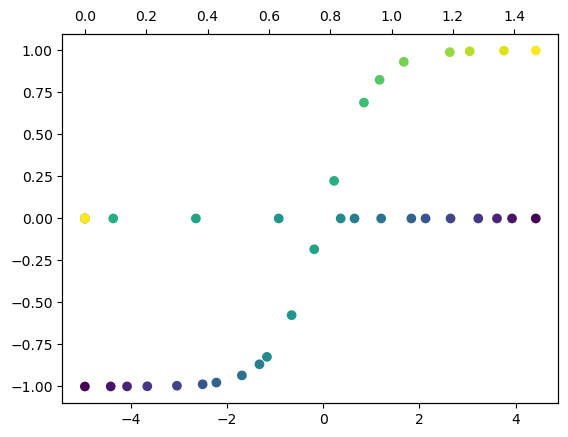

In [ ]:
fig, ax1 = plt.subplots()

ax1.scatter(np.array(df['x_coord'])[::10], np.array(df['y_coord'])[::10], c=np.linspace(start=0, stop=1, num=20), cmap="viridis")

ax2 = ax1.twiny()
ax2.scatter(np.array(df['encoded'])[::10], [0]*20, c=np.linspace(start=0, stop=1, num=20), cmap="viridis")
plt.show()
#some values for x give rise to same encoded coordinate